In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from tensorflow.keras import backend as K
import gc

In [3]:
print("s..")

s..


In [4]:
df = pd.read_csv("../input/breakhis/Folds.csv")
df = df.sample(frac=.37)
path = "../input/breakhis/BreaKHis_v1/" 
gc.collect()

22

In [5]:
df.head()

,fold,mag,grp,filename
33810,5,400,train,BreaKHis_v1/histology_slides/breast/malignant/...
15466,2,100,test,BreaKHis_v1/histology_slides/breast/malignant/...
14033,2,40,test,BreaKHis_v1/histology_slides/breast/benign/SOB...
25170,4,40,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
25882,4,200,train,BreaKHis_v1/histology_slides/breast/malignant/...


In [6]:
x=[]
y=[]
for i in tqdm(range(df.shape[0])):
    if df['mag'].iloc[i] in [200,100]:
        img = image.load_img(path + df['filename'].iloc[i], target_size=(224,224,1), grayscale=False)  ## 28 28
        img = image.img_to_array(img)
        img = img/255
        x.append(img)

        if (df['filename'].iloc[i].find('benign') != -1): 
            y.append(0) 
        else:
            y.append(1)
        
x = np.array(x)
y = np.array(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2, shuffle=True)
del x
del y
gc.collect()
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, random_state=42, test_size=0.5 , shuffle=True)


100%|██████████| 14632/14632 [02:33<00:00, 95.35it/s] 


In [24]:
gc.collect()

print(x_train.shape)
print(x_test.shape)
print(x_val.shape)
print("-----------")
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(6091, 7, 7, 1920)
(761, 7, 7, 1920)
(762, 7, 7, 1920)
-----------
(6091,)
(761,)
(762,)


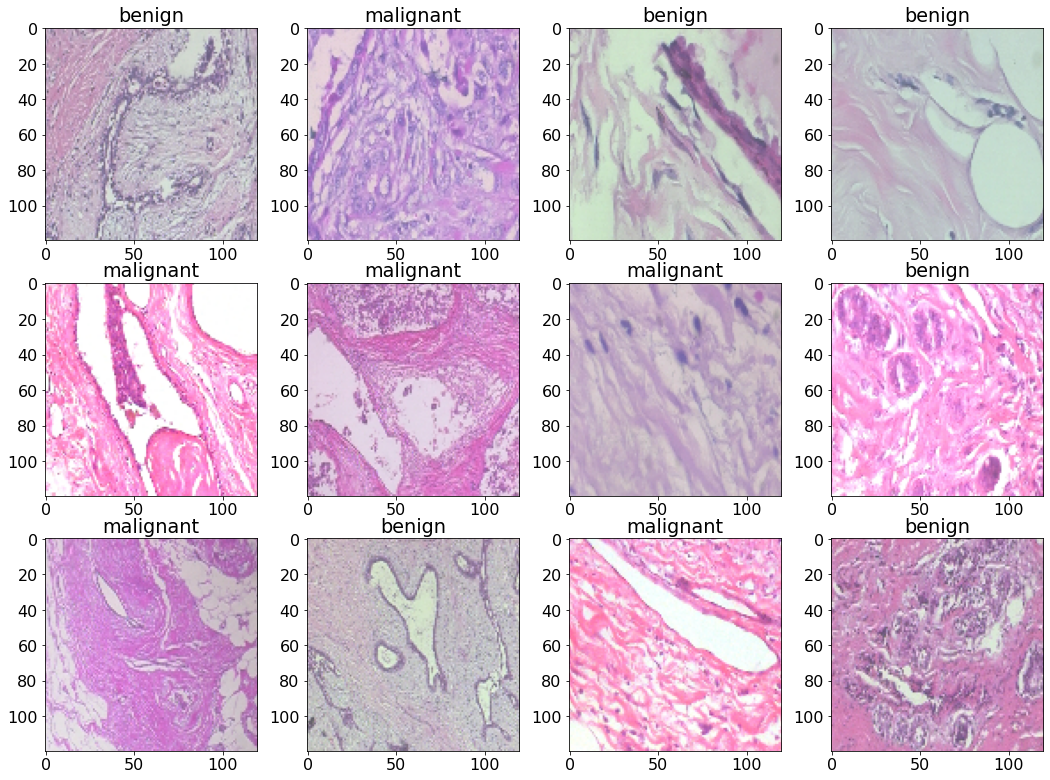

In [25]:
fig = plt.figure(figsize=(18, 18))
for i in range(12,24,1):
    img =image.load_img(path + df['filename'].iloc[i], target_size=(120,120,1), grayscale=False)
#     plt.figure()
#     plt.imshow(img)
    fig.add_subplot(4, 4,i-11)
    if (df['filename'].iloc[i].find('benign') != -1): 
        plt.title("benign")
    else:
        plt.title("malignant")

    plt.imshow(img)
plt.show()

In [8]:
## imoportant modules
from tensorflow.keras.applications import  DenseNet201
from keras import layers
from keras.optimizers import Adam

base_layer = DenseNet201(
    weights='../input/densenet201/densenet201_weights_tf_dim_ordering_tf_kernels_notop.h5',
    include_top=False,
    input_shape=(224,224,3)
)

In [9]:
gc.collect()

1841

In [10]:
print("start.....")
x_train = base_layer.predict(x_train)
gc.collect()
print("end")
x_test = base_layer.predict(x_test);
gc.collect()
print("end2")
x_val = base_layer.predict(x_val);
gc.collect()

start.....
end
end2


768

In [11]:
x_test.shape

(761, 7, 7, 1920)

In [12]:
# Define model
from keras import models
from keras import layers
from keras import optimizers

epochs = 100

# model = models.Sequential()
# model.add(layers.Flatten(input_shape=(7,7,1920)))
# model.add(layers.Dense(256, activation='relu', input_dim=(7*7*1920)))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(1, activation='sigmoid'))
# model.summary()

model = models.Sequential()
model.add(layers.GlobalAveragePooling2D(input_shape=(7,7,1920)))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d (Gl (None, 1920)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1920)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1920)              7680      
_________________________________________________________________
dense (Dense)                (None, 6)                 11526     
_________________________________________________________________
dropout_1 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 19,213
Trainable params: 15,373
Non-trainable params: 3,840
________________________________________________

In [13]:
model.compile(optimizer=optimizers.Adam(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['acc'])

In [14]:
gc.collect()

386

In [15]:
history = model.fit(x_train, y_train, batch_size=5, epochs = 50, validation_data=(x_val, y_val))

Epoch 1/50
1219/1219 [==============================] - 4s 3ms/step - loss: 0.7051 - acc: 0.6017 - val_loss: 0.5206 - val_acc: 0.7375
Epoch 2/50
1219/1219 [==============================] - 3s 2ms/step - loss: 0.5813 - acc: 0.7128 - val_loss: 0.4716 - val_acc: 0.7612
Epoch 3/50
1219/1219 [==============================] - 3s 2ms/step - loss: 0.5441 - acc: 0.7169 - val_loss: 0.4514 - val_acc: 0.7979
Epoch 4/50
1219/1219 [==============================] - 3s 2ms/step - loss: 0.5252 - acc: 0.7461 - val_loss: 0.4174 - val_acc: 0.8307
Epoch 5/50
1219/1219 [==============================] - 3s 2ms/step - loss: 0.5305 - acc: 0.7384 - val_loss: 0.3921 - val_acc: 0.8491
Epoch 6/50
1219/1219 [==============================] - 3s 2ms/step - loss: 0.5118 - acc: 0.7607 - val_loss: 0.3840 - val_acc: 0.8543
Epoch 7/50
1219/1219 [==============================] - 3s 2ms/step - loss: 0.4956 - acc: 0.7557 - val_loss: 0.3716 - val_acc: 0.8570
Epoch 8/50
1219/1219 [==============================] - 3s 2ms

<AxesSubplot:>

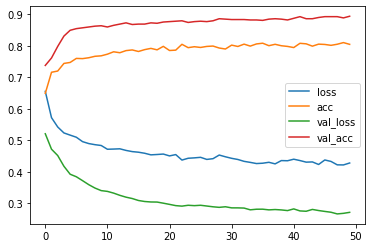

In [17]:
history_df = pd.DataFrame(history.history)
history_df.plot()

In [16]:
y_pred = model.predict_classes(x_test)
acc_test = 0

for i in range(x_test.shape[0]):
    if(y_pred[i] == y_test[i]):
        acc_test= acc_test+1
print("Accuracy test : "  , (acc_test/y_test.shape[0])*100)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy test :  91.06438896189225


In [18]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
# Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
# Recall
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred, average=None))
# Precision
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred, average=None))

[[195  53]
 [ 15 498]]
0.9106438896189225
[0.78629032 0.97076023]
[0.92857143 0.90381125]


## model analysis

In [19]:
acc = accuracy_score(y_test, y_pred)
racall=recall_score(y_test, y_pred, average='binary')
prec =precision_score(y_test, y_pred, average='binary')
import sklearn
f1_score=sklearn.metrics.f1_score(y_test, y_pred)

In [20]:
a=[acc,racall,prec,f1_score]
a=[round(x*100,2)for x in a]
a

[91.06, 97.08, 90.38, 93.61]

In [21]:
y_train

array([1, 1, 1, ..., 1, 1, 1])

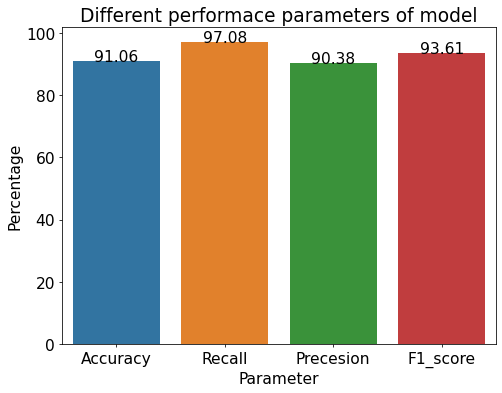

In [23]:
import seaborn
fig = plt.figure(figsize = (8, 6),dpi=70)
plt.rcParams['font.size'] = '16'
g=seaborn.barplot(x=["Accuracy","Recall","Precesion",'F1_score'],y=a)

for i in range(len(a)):
        g.text(i, a[i], a[i], ha = 'center')
plt.xlabel("Parameter")
plt.ylabel("Percentage")
plt.title("Different performace parameters of model")


plt.show()